In [1]:
# Source https://www.kaggle.com/bbusath5/sf-bike-share-exploration-with-sql

Today I will be performing an exploratory analysis on the SF Bay Area Bike Share database using SQLite supplemented by the pandas library.  The goal of this project is to demonstrate proficiency in extracting data from database files using SQL and the ability to analyze these values in context. This database contains four data tables: station, status, trip, and weather.

Here are some questions I will try to answer over the course of this exploration:
* What was the trip with the longest duration?
* Do unregistered users take longer or shorter trips?
*  Which stations are the most popular?
* Which routes are the most popular?




**Importing Packages**

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

First, the data must be imported into python. I will set up a function that takes an sql query as a parameter and returns a dataframe visualization of that query. This will save coding time in the long run.

In [2]:
%load_ext sql

### Defining Color Palette 

In [3]:
colors = ["#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA']

keys = ["red", "salmon","tan",'light_green','aqua_green','purple']
values = ["#FF9AA2", "#FFB7B2","#FFDAC1",'#E2F0CB','#B5EAD7','#C7CEEA']
color_dct = dict(zip(keys, values))

### Defining Dodge Chart

In [4]:
def dodge_this(N, val_SF, val_DC, val_NYC, title, y_lab, x_tick_lab, leg):
    
    ind = np.arange(N)  # the x locations for the groups
    width = 0.2       # the width of the bars
    fig = plt.figure()
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind-0.5*width, val_NYC, width, color=color_dct['aqua_green'], ec='black')
    rects2 = ax.bar(ind+0.5*width, val_SF, width, color=color_dct['salmon'], alpha=0.75, ec='black')
    rects3 = ax.bar(ind+1.5*width, val_DC, width, color=color_dct['purple'], alpha=0.75, ec='black')

    # add some
    ax.set_ylabel(y_lab)
    ax.set_title(title)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(x_tick_lab)

    ax.legend( (rects1[0], rects2[0], rects3[0]), leg)
    plt.show()

### Columns in tables

In [5]:
#___SF___

%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
%sql SELECT * FROM trip LIMIT 1;

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code
4069,174,8/29/2013 9:08,2nd at South Park,64,8/29/2013 9:11,2nd at South Park,64,288,Subscriber,94114


In [6]:
#___DC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
%sql SELECT * FROM dc LIMIT 1;

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


dummy,tripduration,starttime,stoptime,start_station_id,start_station_name,end_station_id,end_station_name,bikeid,usertype
1,1012.0,2010-09-20 11:27:04,2010-09-20 11:43:56,31208,M St & New Jersey Ave SE,31108,4th & M St SW,W00742,Member


In [7]:
#___NYC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
%sql SELECT * FROM yr_2019 LIMIT 1;

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


dummy,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,counter,year,age
1,320.0,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160,Central Park West & W 76 St,40.77896784,-73.97374737,3283,W 89 St & Columbus Ave,40.7882213,-73.97041561,15839,Subscriber,1971,1,1,2019,48


### Number of Rides By Subscription Type

In [8]:
#___SF___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
result_SF = %sql SELECT subscription_type, count(*) AS count FROM trip GROUP BY subscription_type;
df_user_type_SF = result_SF.DataFrame()

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


In [9]:
#___DC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
result_DC = %sql SELECT usertype, count(*) AS count FROM dc GROUP BY usertype;
df_user_type_DC = result_DC.DataFrame()
df_user_type_DC = df_user_type_DC[:2]

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


In [10]:
#___NYC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
result_NYC = %sql SELECT usertype, count(*) AS count FROM cb GROUP BY usertype;
df_user_type_NYC = result_NYC.DataFrame()

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


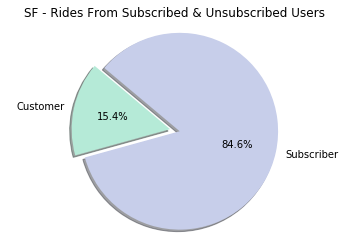

In [11]:
#___SF___
labels = ['Customer', 'Subscriber']
sizes = df_user_type_SF['count']
colors = [color_dct['aqua_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('SF - Rides From Subscribed & Unsubscribed Users')
plt.axis('equal')
plt.show()

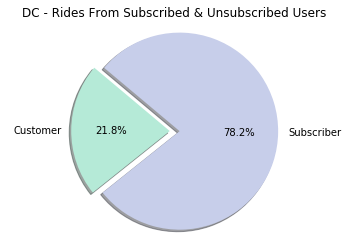

In [12]:
#___DC___
labels = ['Customer', 'Subscriber']
sizes = df_user_type_DC['count']
colors = [color_dct['aqua_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('DC - Rides From Subscribed & Unsubscribed Users')
plt.axis('equal')
plt.show()

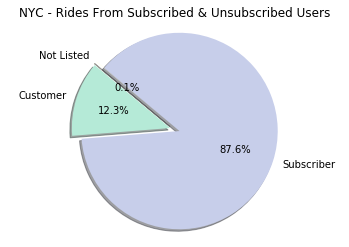

In [13]:
#___NYC___
labels = ['Not Listed', 'Customer', 'Subscriber']
sizes = df_user_type_NYC['count']
colors = ['lightyellow', color_dct['aqua_green'], color_dct['purple']]
explode = (0.1, 0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('NYC - Rides From Subscribed & Unsubscribed Users')
plt.axis('equal')
plt.show()

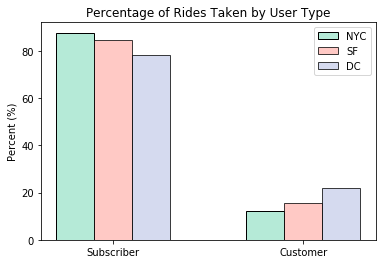

In [14]:
# User Type by City
val_SF = (84.6, 15.4)
val_DC = (78.2, 21.8)
val_NYC = (87.6, 12.3)
N = 2
y_lab = 'Percent (%)'
title = 'Percentage of Rides Taken by User Type'
x_tick_lab = ('Subscriber', 'Customer')
leg = ('NYC', 'SF', 'DC')

dodge_this(N, val_SF, val_DC, val_NYC, title, y_lab, x_tick_lab, leg)

### Rides From Particular Stations

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


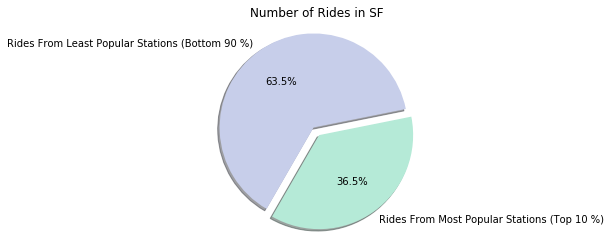

In [41]:
#___SF___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
result_SF = %sql SELECT start_station_name AS Station, count(*) AS Count FROM trip GROUP BY start_station_name;
df_station_rides_SF = result_SF.DataFrame()

num_observations = df_station_rides_SF['Count'].sum()
df_station_rides_SF['Percent of Total Rides'] = round(100 * (df_station_rides_SF['Count'] / num_observations), 2)
df_station_rides_SF.rename(columns={'Count':'Number of Rides'}, inplace=True)
df_station_rides_SF.sort_values(by=['Number of Rides'], ascending=False, inplace=True)

percent=10
n_obs_top_percent = round(df_station_rides_SF.shape[0] * (percent/100))
rides_from_top_percent = df_station_rides_SF[0:n_obs_top_percent+1]['Number of Rides'].sum()
rides_from_bottom_percent = df_station_rides_SF[n_obs_top_percent+1:]['Number of Rides'].sum()
df_station_rides_SF

d = {'Percent of Stations': [str(percent), str(100-percent)], 'Number of Rides': [rides_from_top_percent, rides_from_bottom_percent]}
df = pd.DataFrame(data=d)

labels = [f'Rides From Most Popular Stations (Top {percent} %)', f'Rides From Least Popular Stations (Bottom {100-percent} %)']
sizes = df['Number of Rides']
colors = [color_dct['aqua_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=-120)
plt.title('Number of Rides in SF')
plt.axis('equal')
plt.show()

In [21]:
#___DC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
result_DC = %sql SELECT start_station_name AS Station, count(*) AS Count FROM dc GROUP BY start_station_name;
df_station_rides_DC = result_DC.DataFrame()
num_observations = df_station_rides_DC['Count'].sum()
df_station_rides_DC['Percent of Total Rides'] = round(100 * (df_station_rides_DC['Count'] / num_observations), 2)
df_station_rides_DC.rename(columns={'Count':'Number of Rides'}, inplace=True)
df_station_rides_DC.sort_values(by=['Number of Rides'], ascending=False, inplace=True)

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
Done.


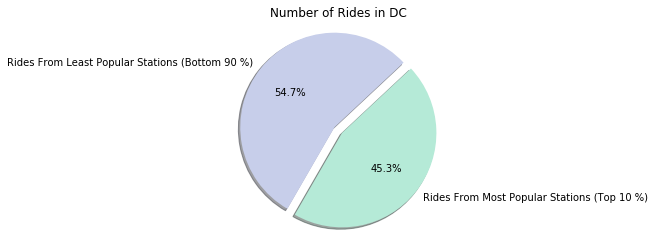

In [22]:
#___DC___
percent=10
n_obs_top_percent = round(df_station_rides_DC.shape[0] * (percent/100))
rides_from_top_percent = df_station_rides_DC[0:n_obs_top_percent+1]['Number of Rides'].sum()
rides_from_bottom_percent = df_station_rides_DC[n_obs_top_percent+1:]['Number of Rides'].sum()
rides_from_bottom_percent

d = {'Percent of Stations': [str(percent), str(100-percent)], 'Number of Rides': [rides_from_top_percent, rides_from_bottom_percent]}
df = pd.DataFrame(data=d)

labels = [f'Rides From Most Popular Stations (Top {percent} %)', f'Rides From Least Popular Stations (Bottom {100-percent} %)']
sizes = df['Number of Rides']
colors = [color_dct['aqua_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=-120)
plt.title('Number of Rides in DC')
plt.axis('equal')
plt.show()

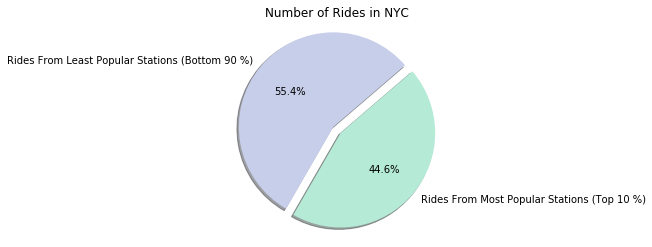

In [42]:
#___NYC___
df_station_rides = pd.read_csv('Number_of_Rides_Starting_From_Each_Station.csv')
df_station_rides.sort_values(by=['Number of Rides'], ascending=False, inplace=True)

percent=10
n_obs_top_percent = round(df_station_rides.shape[0] * (percent/100))
rides_from_top_percent = df_station_rides[0:n_obs_top_percent+1]['Number of Rides'].sum()
rides_from_bottom_percent = df_station_rides[n_obs_top_percent+1:]['Number of Rides'].sum()
rides_from_bottom_percent

d = {'Percent of Stations': [str(percent), str(100-percent)], 'Number of Rides': [rides_from_top_percent, rides_from_bottom_percent]}
df = pd.DataFrame(data=d)

labels = [f'Rides From Most Popular Stations (Top {percent} %)', f'Rides From Least Popular Stations (Bottom {100-percent} %)']
sizes = df['Number of Rides']
colors = [color_dct['aqua_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=-120)
plt.title('Number of Rides in NYC')
plt.axis('equal')
plt.show()

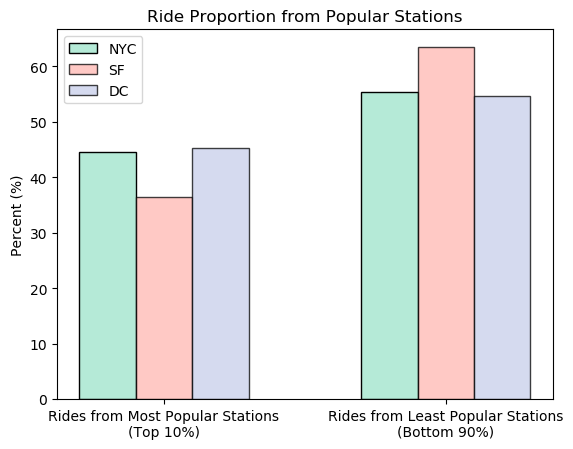

In [165]:
# 
val_SF = (36.5, 63.5)
val_DC = (45.3, 54.7)
val_NYC = (44.6, 55.4)
N = 2
y_lab = 'Percent (%)'
title = 'Ride Proportion from Popular Stations'
x_tick_lab = ('Rides from Most Popular Stations\n(Top 10%)', 'Rides from Least Popular Stations\n(Bottom 90%)')
leg = ('NYC', 'SF', 'DC')

dodge_this(N, val_SF, val_DC, val_NYC, title, y_lab, x_tick_lab, leg)

### Trip Duration

In [13]:
#___SF___
result_SF = %sql SELECT duration FROM trip ORDER BY duration DESC;

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
CPU times: user 658 ms, sys: 136 ms, total: 794 ms
Wall time: 799 ms


In [14]:
#___SF___
df_duration_SF = result_SF.DataFrame()
df_duration_SF['tripduration_hrs'] = df_duration_SF['duration'] / (60*60)
df_duration_SF['tripduration_days'] = df_duration_SF['duration'] / (60*60*24)
# df_duration_NYC[['tripduration', 'tripduration_hrs', 'tripduration_days']].head()
result_index = df_duration_SF['tripduration_hrs'].sub(1).abs().idxmin()
# df_duration_NYC.iloc[[result_index]][['tripduration', 'tripduration_hrs', 'tripduration_days']]
num_observations = df_duration_SF.shape[0]
print(f'The total number of rows in the 2019 table is {num_observations}.\nWhile the total number of tripdurations above 60 minutes is {result_index}.')
print(f'\nThe trips above 1 hour represent {round(100*(result_index/num_observations),2)} percent of the total dataset.')

The total number of rows in the 2019 table is 669959.
While the total number of tripdurations above 60 minutes is 21242.

The trips above 1 hour represent 3.17 percent of the total dataset.


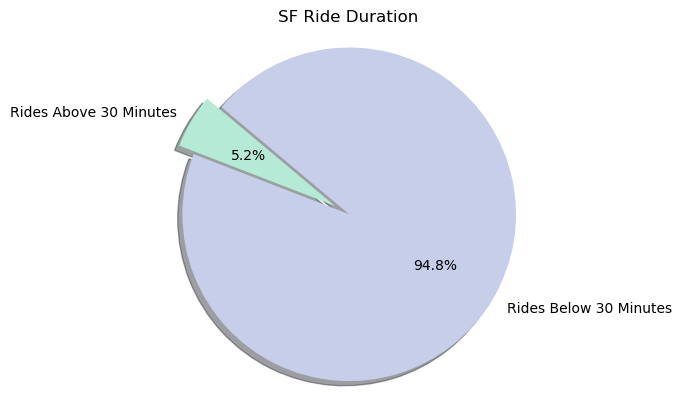

In [57]:
#___SF___
minutes = 30
num_observations = df_duration_SF.shape[0]
num_above_minute = df_duration_SF[df_duration_SF['duration']>=60*minutes].shape[0]
num_below_minute = num_observations - num_above_minute

d = {f'Category': [f'Rides Above {minutes} Minutes', f'Rides Below {minutes} Minutes'], 'Number of Rides': [ num_above_minute, num_below_minute]}
df = pd.DataFrame(data=d)

labels = [f'Rides Above {minutes} Minutes', f'Rides Below {minutes} Minutes']
sizes = df['Number of Rides']
colors = [color_dct['aqua_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('SF Ride Duration')
plt.axis('equal')
plt.show()

In [24]:
#___DC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
result_DC = %sql SELECT tripduration FROM dc ORDER BY tripduration DESC;

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
Done.


In [26]:
#___DC___
df_duration_DC = result_DC.DataFrame()
df_duration_DC['tripduration_hrs'] = df_duration_DC['tripduration'] / (60*60)
df_duration_DC['tripduration_days'] = df_duration_DC['tripduration'] / (60*60*24)

result_index = df_duration_DC['tripduration_hrs'].sub(1).abs().idxmin()

num_observations = df_duration_DC.shape[0]
print(f'The total number of rows in the 2019 table is {num_observations}.\nWhile the total number of tripdurations above 60 minutes is {result_index}.')
print(f'\nThe trips above 1 hour represent {round(100*(result_index/num_observations),2)} percent of the total dataset.')

The total number of rows in the 2019 table is 19117643.
While the total number of tripdurations above 60 minutes is 823713.

The trips above 1 hour represent 4.31 percent of the total dataset.


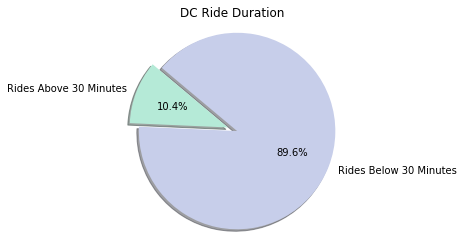

In [27]:
#___DC___
minutes = 30
num_observations = df_duration_DC.shape[0]
num_above_minute = df_duration_DC[df_duration_DC['tripduration']>=60*minutes].shape[0]
num_below_minute = num_observations - num_above_minute

d = {f'Category': [f'Rides Above {minutes} Minutes', f'Rides Below {minutes} Minutes'], 'Number of Rides': [ num_above_minute, num_below_minute]}
df = pd.DataFrame(data=d)

labels = [f'Rides Above {minutes} Minutes', f'Rides Below {minutes} Minutes']
sizes = df['Number of Rides']
colors = [color_dct['aqua_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('DC Ride Duration')
plt.axis('equal')
plt.show()

In [16]:
#___NYC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
result_NYC = %sql SELECT tripduration FROM yr_2019 ORDER BY tripduration DESC;

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
CPU times: user 29.4 s, sys: 11.4 s, total: 40.7 s
Wall time: 57 s


In [17]:
#___NYC___
df_duration_NYC = result_NYC.DataFrame()
df_duration_NYC['tripduration_hrs'] = df_duration_NYC['tripduration'] / (60*60)
df_duration_NYC['tripduration_days'] = df_duration_NYC['tripduration'] / (60*60*24)
# df_duration_NYC[['tripduration', 'tripduration_hrs', 'tripduration_days']].head()
result_index = df_duration_NYC['tripduration_hrs'].sub(1).abs().idxmin()
# df_duration_NYC.iloc[[result_index]][['tripduration', 'tripduration_hrs', 'tripduration_days']]
num_observations = df_duration_NYC.shape[0]
print(f'The total number of rows in the 2019 table is {num_observations}.\nWhile the total number of tripdurations above 60 minutes is {result_index}.')
print(f'\nThe trips above 1 hour represent {round(100*(result_index/num_observations),2)} percent of the total dataset.')

The total number of rows in the 2019 table is 20956644.
While the total number of tripdurations above 60 minutes is 197937.

The trips above 1 hour represent 0.94 percent of the total dataset.


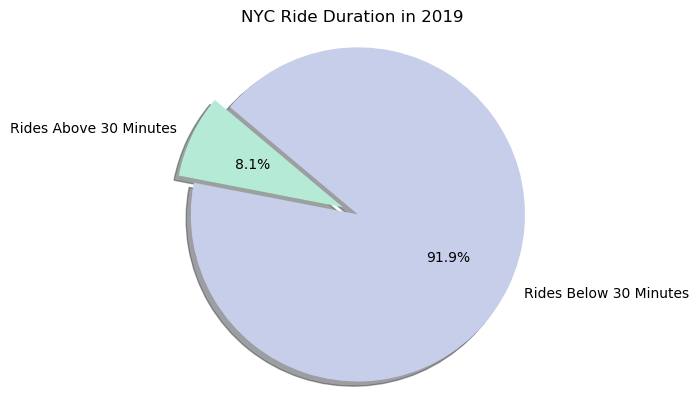

In [52]:
#___NYC___
minutes = 30
num_observations = df_duration_NYC.shape[0]
num_above_minute = df_duration_NYC[df_duration_NYC['tripduration']>=60*minutes].shape[0]
num_below_minute = num_observations - num_above_minute

d = {f'Category': [f'Rides Above {minutes} Minutes', f'Rides Below {minutes} Minutes'], 'Number of Rides': [ num_above_minute, num_below_minute]}
df = pd.DataFrame(data=d)

labels = [f'Rides Above {minutes} Minutes', f'Rides Below {minutes} Minutes']
sizes = df['Number of Rides']
colors = [color_dct['aqua_green'], color_dct['purple']]
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140, )
plt.title('NYC Ride Duration in 2019')
plt.axis('equal')
plt.show()

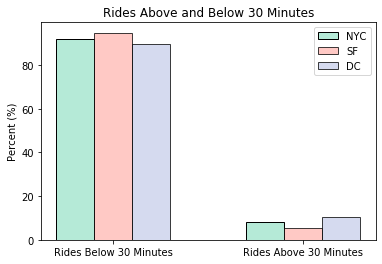

In [13]:
# 
val_SF = (94.8, 5.2)
val_DC = (89.6, 10.4)
val_NYC = (91.9, 8.1)
N = 2
y_lab = 'Percent (%)'
title = 'Rides Above and Below 30 Minutes'
x_tick_lab = ('Rides Below 30 Minutes', 'Rides Above 30 Minutes')
leg = ('NYC', 'SF', 'DC')

dodge_this(N, val_SF, val_DC, val_NYC, title, y_lab, x_tick_lab, leg)

### Leaving vs. Arriving Ratio for Each Station

In [43]:
#___SF___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
    
result_start_station_SF = %sql SELECT start_station_name AS Start_Station, count(*) AS Count FROM trip GROUP BY start_station_name;
result_end_station_SF = %sql SELECT end_station_name AS End_Station, count(*) AS Count FROM trip GROUP BY end_station_name;

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


In [44]:
#___SF___
df_start_station_rides_SF = result_start_station_SF.DataFrame().sort_values(by=['Count'], ascending=False)
df_end_station_rides_SF = result_end_station_SF.DataFrame().sort_values(by=['Count'], ascending=False)

num_observations = df_end_station_rides_SF['Count'].sum()
df_end_station_rides_SF['Percent of Total Rides'] = round(100 * (df_end_station_rides_SF['Count'] / num_observations), 2)
df_end_station_rides_SF.rename(columns={'Count':'Number of Rides'}, inplace=True)
df_end_station_rides_SF.head(2)
df_end_station_rides_SF.to_csv('Number_of_Rides_Ending_From_Each_Station.csv', index=False)

num_observations = df_start_station_rides_SF['Count'].sum()
df_start_station_rides_SF['Percent of Total Rides'] = round(100 * (df_start_station_rides_SF['Count'] / num_observations), 2)
df_start_station_rides_SF.rename(columns={'Count':'Number of Rides'}, inplace=True)

left_SF = df_start_station_rides_SF.copy()
left_SF.set_index('Start_Station', inplace=True)
left_SF.rename(columns = {'Number of Rides':'Number of Start Rides'}, inplace=True)
left_SF.drop(['Percent of Total Rides'], axis=1, inplace=True)

right_SF = df_end_station_rides_SF.copy()
right_SF.set_index('End_Station', inplace=True)
right_SF.rename(columns = {'Number of Rides':'Number of End Rides'}, inplace=True)
right_SF.drop(['Percent of Total Rides'], axis=1, inplace=True)
right_mod_SF = right_SF.groupby('End_Station').agg({'Number of End Rides': 'sum'})
right_mod_SF.head(2)

df_concat_SF = pd.concat([left_SF, right_mod_SF], axis=1, sort=False)

df_concat_SF['Start_Ratio'] = df_concat_SF['Number of Start Rides'] / df_concat_SF['Number of End Rides']
df_concat_SF.dropna(inplace=True) 
df_concat_SF.sort_values(by=['Start_Ratio'], inplace=True)

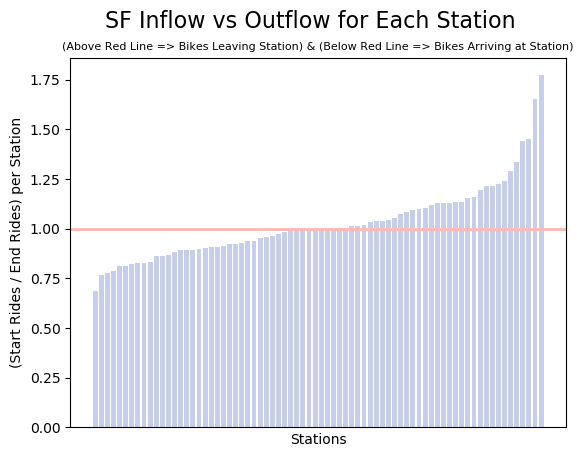

In [50]:
#___SF___
plt.style.use('default')
plt.bar(df_concat_SF.index.to_list(), df_concat_SF['Start_Ratio'], color=color_dct['purple'])
plt.xlabel("Stations")
plt.ylabel("(Start Rides / End Rides) per Station")
plt.suptitle('SF Inflow vs Outflow for Each Station', fontsize=16)
plt.title("(Above Red Line => Bikes Leaving Station) & (Below Red Line => Bikes Arriving at Station)", fontsize=8)
# plt.yscale('log')
plt.xticks([])
plt.axhline(y=1, linewidth=2, color=color_dct['salmon'])
plt.show()

In [29]:
#___DC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
result_start_station_DC = %sql SELECT start_station_name AS Start_Station, count(*) AS Count FROM dc GROUP BY start_station_name;
result_end_station_DC = %sql SELECT end_station_name AS End_Station, count(*) AS Count FROM dc GROUP BY start_station_name;

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
Done.
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
Done.


In [34]:
#___DC___
df_start_station_rides_DC = result_start_station_DC.DataFrame()
num_observations = df_start_station_rides_DC['Count'].sum()
df_start_station_rides_DC['Percent of Total Rides'] = round(100 * (df_start_station_rides_DC['Count'] / num_observations), 2)
df_start_station_rides_DC.rename(columns={'Count':'Number of Rides'}, inplace=True)
df_start_station_rides_DC.head(5)

df_end_station_rides_DC = result_end_station_DC.DataFrame()
num_observations = df_end_station_rides_DC['Count'].sum()
df_end_station_rides_DC['Percent of Total Rides'] = round(100 * (df_end_station_rides_DC['Count'] / num_observations), 2)
df_end_station_rides_DC.rename(columns={'Count':'Number of Rides'}, inplace=True)
df_end_station_rides_DC.head(5)

left = df_start_station_rides_DC.copy()
left.set_index('Start_Station', inplace=True)
left.rename(columns = {'Number of Rides':'Number of Start Rides'}, inplace=True)
left.drop(['Percent of Total Rides'], axis=1, inplace=True)

right = df_end_station_rides_DC.copy()
right.set_index('End_Station', inplace=True)
right.rename(columns = {'Number of Rides':'Number of End Rides'}, inplace=True)
right.drop(['Percent of Total Rides'], axis=1, inplace=True)
right_mod = right.groupby('End_Station').agg({'Number of End Rides': 'sum'})
right_mod.head(2)

df_concat_DC = pd.concat([left, right_mod], axis=1, sort=False)

df_concat_DC['Start_Ratio'] = df_concat_DC['Number of Start Rides'] / df_concat_DC['Number of End Rides']
df_concat_DC.dropna(inplace=True)
df_concat_DC.sort_values(by=['Start_Ratio'], inplace=True)

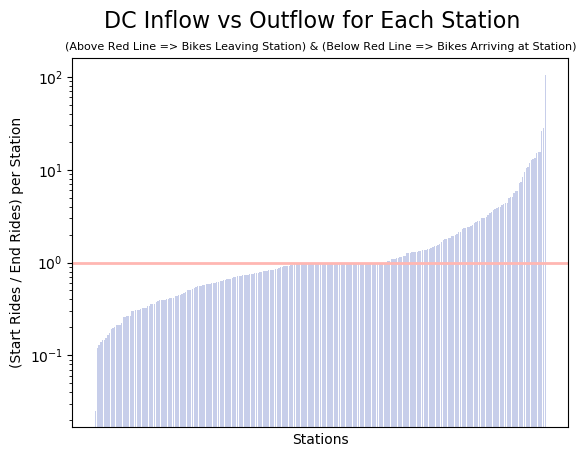

In [36]:
#___DC___
plt.style.use('default')
plt.bar(df_concat_DC.index.to_list(), df_concat_DC['Start_Ratio'], color=color_dct['purple'])
plt.xlabel("Stations")
plt.ylabel("(Start Rides / End Rides) per Station")
plt.suptitle('DC Inflow vs Outflow for Each Station', fontsize=16)
plt.title("(Above Red Line => Bikes Leaving Station) & (Below Red Line => Bikes Arriving at Station)", fontsize=8)
plt.yscale('log')
plt.xticks([])
plt.axhline(y=1, linewidth=2, color=color_dct['salmon'])
plt.show()

In [47]:
#___NYC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
result = %sql SELECT end_station_name AS End_Station, count(*) AS Count FROM cb GROUP BY start_station_name;

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.
CPU times: user 1min 16s, sys: 34.4 s, total: 1min 50s
Wall time: 3min 22s


In [48]:
#___NYC___
df_end_station_rides = result.DataFrame()
num_observations = df_end_station_rides['Count'].sum()
df_end_station_rides['Percent of Total Rides'] = round(100 * (df_end_station_rides['Count'] / num_observations), 2)
df_end_station_rides.rename(columns={'Count':'Number of Rides'}, inplace=True)
df_end_station_rides.head(5)
df_end_station_rides.to_csv('Number_of_Rides_Ending_From_Each_Station.csv', index=False)

df_start_station_rides_NYC = pd.read_csv('Number_of_Rides_Starting_From_Each_Station.csv')
left = df_start_station_rides_NYC.copy()
left.set_index('Station', inplace=True)
left.rename(columns = {'Number of Rides':'Number of Start Rides'}, inplace=True)
left.drop(['Percent of Total Rides'], axis=1, inplace=True)

df_end_station_rides_NYC = pd.read_csv('Number_of_Rides_Ending_From_Each_Station.csv')
right = df_end_station_rides_NYC.copy()
right.set_index('End_Station', inplace=True)
right.rename(columns = {'Number of Rides':'Number of End Rides'}, inplace=True)
right.drop(['Percent of Total Rides'], axis=1, inplace=True)
right_mod = right.groupby('End_Station').agg({'Number of End Rides': 'sum'})
right_mod.head(2)

df_concat = pd.concat([left, right_mod], axis=1, sort=False)

df_concat['Start_Ratio'] = df_concat['Number of Start Rides'] / df_concat['Number of End Rides']
df_concat.dropna(inplace=True) # 600 STATIONS WERE NA. I.e. THEY HAVE NEVER BEEN USED AS END STATIONS
df_concat.sort_values(by=['Start_Ratio'], inplace=True)

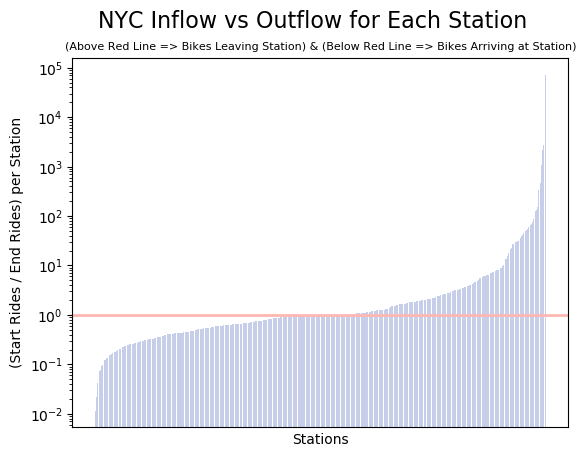

In [49]:
#___NYC___
plt.style.use('default')
plt.bar(df_concat.index.to_list(), df_concat['Start_Ratio'], color=color_dct['purple'])
plt.xlabel("Stations")
plt.ylabel("(Start Rides / End Rides) per Station")
plt.suptitle('NYC Inflow vs Outflow for Each Station', fontsize=16)
plt.title("(Above Red Line => Bikes Leaving Station) & (Below Red Line => Bikes Arriving at Station)", fontsize=8)
plt.yscale('log')
plt.xticks([])
plt.axhline(y=1, linewidth=2, color=color_dct['salmon'])
plt.show()

### Average and Median Trip Duration

In [71]:
#___SF___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
result_duration_SF = %sql SELECT subscription_type, AVG(duration)/60 AS 'Average Duration' FROM trip GROUP BY subscription_type;
df_duration_user_type_SF = result_duration_SF.DataFrame()
df_duration_user_type_SF.head()

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


,subscription_type,Average Duration
0,Customer,65.862689
1,Subscriber,9.834148


In [72]:
#___DC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
result_duration_DC = %sql SELECT usertype, AVG(tripduration)/60 AS 'Average Duration' FROM dc GROUP BY usertype;
df_duration_user_type_DC = result_duration_DC.DataFrame()
df_duration_user_type_DC = df_duration_user_type_DC[:2]
df_duration_user_type_DC

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


,usertype,Average Duration
0,Casual,40.373008
1,Member,12.045229


In [73]:
#___NYC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
result_duration_NYC = %sql SELECT usertype, AVG(tripduration)/60 AS 'Average Duration' FROM cb GROUP BY usertype;
df_duration_user_type_NYC = result_duration_NYC.DataFrame()
df_duration_user_type_NYC = df_duration_user_type_NYC[1:]

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


In [74]:
df_duration_user_type_NYC

,usertype,Average Duration
1,Customer,36.498660
2,Subscriber,13.408173


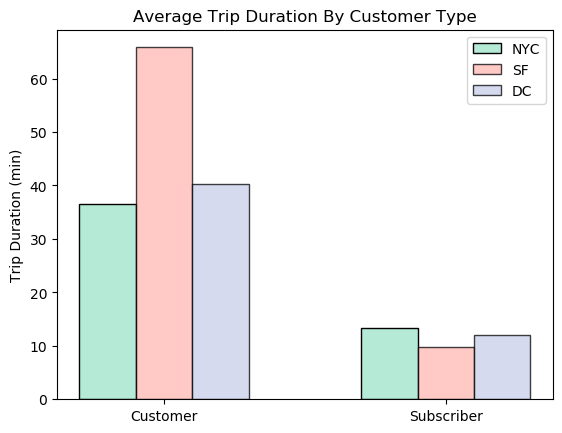

In [167]:
# Average Trip Duration By Customer Type
val_SF = (65.862689, 9.834148)
val_DC = (40.373008, 12.045229)
val_NYC = (36.498660, 13.408173)
N = 2
y_lab = 'Trip Duration (min)'
title = 'Average Trip Duration By Customer Type'
x_tick_lab = ('Customer', 'Subscriber')
leg = ('NYC', 'SF', 'DC')

dodge_this(N, val_SF, val_DC, val_NYC, title, y_lab, x_tick_lab, leg)

In [76]:
#___SF___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
result_duration_SF = %sql SELECT subscription_type, duration AS 'tripduration' FROM trip;
df_duration_user_type_SF = result_duration_SF.DataFrame()
del result_duration_SF
df_duration_user_type_SF = df_duration_user_type_SF.groupby('subscription_type')['tripduration'].median().reset_index().rename(columns={'tripduration':'median_duration'})

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


In [79]:
df_duration_user_type_SF

,subscription_type,median_duration
0,Customer,1116
1,Subscriber,476


In [77]:
#___DC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
result_duration_DC = %sql SELECT usertype, tripduration FROM dc;
df_duration_user_type_DC = result_duration_DC.DataFrame()
del result_duration_DC
df_duration_user_type_DC = df_duration_user_type_DC.groupby('usertype')['tripduration'].median().reset_index().rename(columns={'tripduration':'median_duration'})

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


In [78]:
df_duration_user_type_DC

,usertype,median_duration
0,Casual,1454.0
1,Member,568.0
2,Unknown,553.0


In [195]:
#___NYC___ # USING 2019 AS PROXY
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
result_duration_NYC = %sql SELECT usertype, tripduration FROM yr_2019;
df_duration_user_type_NYC = result_duration_NYC.DataFrame()
del result_duration_NYC
df_duration_user_type_NYC = df_duration_user_type_NYC.groupby('usertype')['tripduration'].median().reset_index().rename(columns={'tripduration':'median_duration'})

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


In [196]:
#___NYC___
df_duration_user_type_NYC

,usertype,median_duration
0,Customer,1194.0
1,Subscriber,552.0


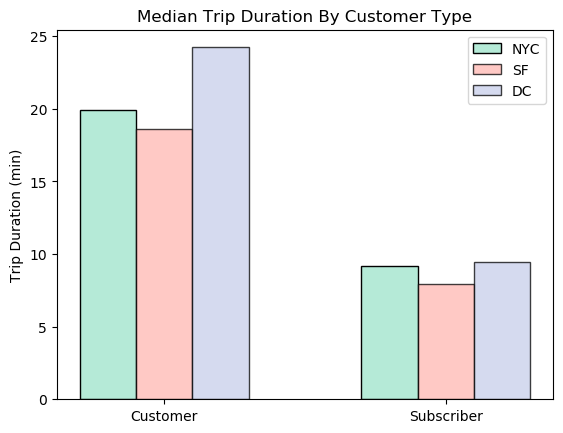

In [168]:
# Median Trip Duration By Customer Type
val_SF = (1116/60, 476/60)
val_DC = (1454.0/60, 568.0/60)
val_NYC = (1194.0/60, 552.0/60)
N = 2
y_lab = 'Trip Duration (min)'
title = 'Median Trip Duration By Customer Type'
x_tick_lab = ('Customer', 'Subscriber')
leg = ('NYC', 'SF', 'DC')

dodge_this(N, val_SF, val_DC, val_NYC, title, y_lab, x_tick_lab, leg)

### Trip Duration Spread

In [89]:
#___SF___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
result_duration_SF =  %sql SELECT duration AS tripduration FROM trip;
df_duration_SF = result_duration_SF.DataFrame()
df_duration_SF['tripduration_min'] = df_duration_SF['tripduration'] / 60
df_duration_SF['tripduration_hr'] = df_duration_SF['tripduration'] / (60*60)
df_duration_SF['tripduration_day'] = df_duration_SF['tripduration'] / (60*60*24)

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


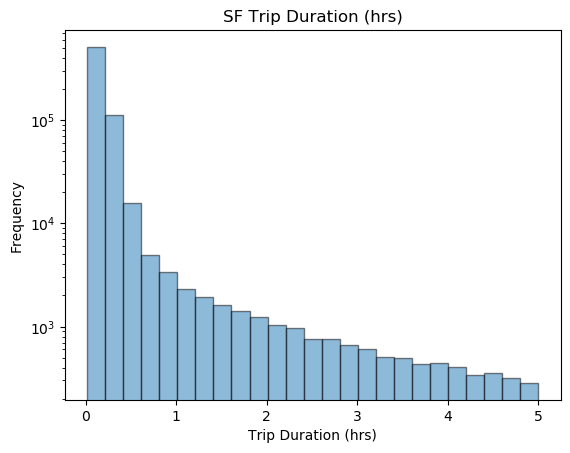

In [208]:
#___SF___
df_duration_SF['tripduration_hr'][df_duration_SF['tripduration_hr']<5].plot.hist(bins = 25, title='SF Trip Duration (hrs)', ec='black', alpha=0.5, log=True)
plt.xlabel("Trip Duration (hrs)")
plt.show()

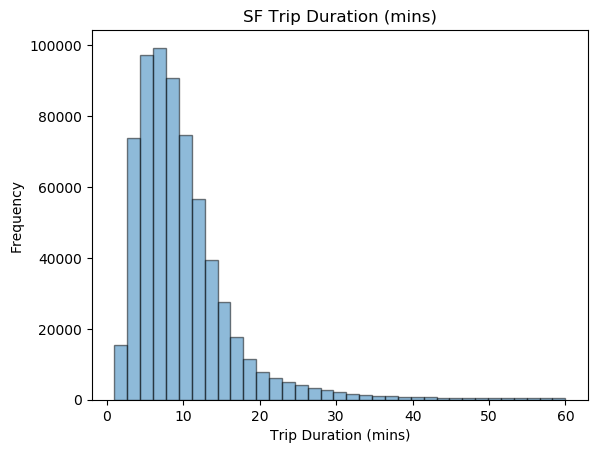

In [207]:
#___SF___
df_duration_SF['tripduration_min'][df_duration_SF['tripduration_min']<60].plot.hist(bins = 35, title='SF Trip Duration (mins)', ec='black', alpha=0.5)#, log=True)
plt.xlabel("Trip Duration (mins)")
plt.show()

In [124]:
#___DC___ COME BACK AND CHANGE TO FULLLLLL
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
result_duration_DC = %sql SELECT tripduration FROM dc;
df_duration_DC = result_duration_DC.DataFrame()
del result_duration_DC
df_duration_DC['tripduration_min'] = df_duration_DC['tripduration'] / 60
df_duration_DC['tripduration_hr'] = df_duration_DC['tripduration'] / (60*60)
df_duration_DC['tripduration_day'] = df_duration_DC['tripduration'] / (60*60*24)

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


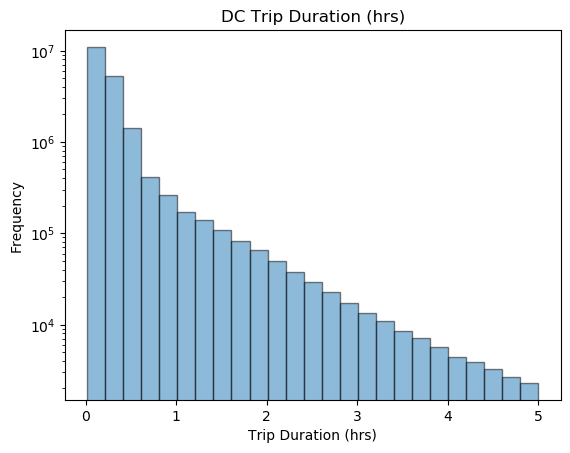

In [125]:
#___DC___
df_duration_DC['tripduration_hr'][df_duration_DC['tripduration_hr']<5].plot.hist(bins = 25, title='DC Trip Duration (hrs)', ec='black', alpha=0.5, log=True)
plt.xlabel("Trip Duration (hrs)")
plt.show()

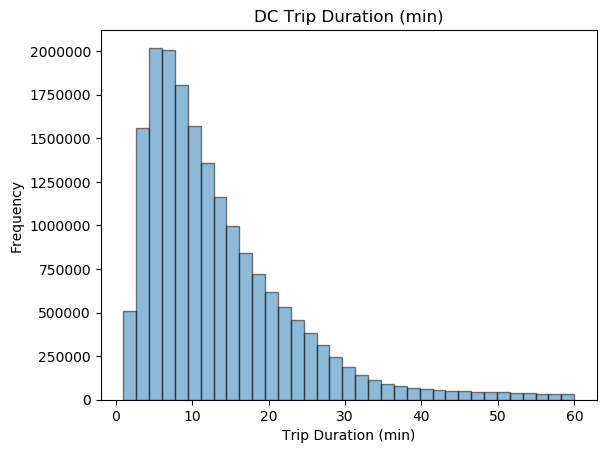

In [126]:
#___DC___
df_duration_DC['tripduration_min'][df_duration_DC['tripduration_min']<60].plot.hist(bins = 35, title='DC Trip Duration (min)', ec='black', alpha=0.5)#, log=True)
plt.xlabel("Trip Duration (min)")
plt.show()

In [88]:
#___NYC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
result_duration_NYC = %sql SELECT tripduration FROM yr_2019;
df_duration_NYC = result_duration_NYC.DataFrame()
df_duration_NYC['tripduration_min'] = df_duration_NYC['tripduration'] / 60
df_duration_NYC['tripduration_hr'] = df_duration_NYC['tripduration'] / (60*60)
df_duration_NYC['tripduration_day'] = df_duration_NYC['tripduration'] / (60*60*24)

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


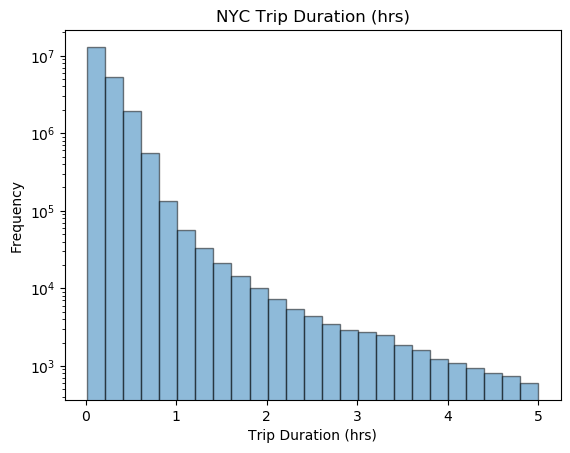

In [216]:
#___NYC___
df_duration_NYC['tripduration_hr'][df_duration_NYC['tripduration_hr']<5].plot.hist(bins = 25, title='NYC Trip Duration (hrs)', ec='black', alpha=0.5, log=True)
plt.xlabel("Trip Duration (hrs)")
plt.show()

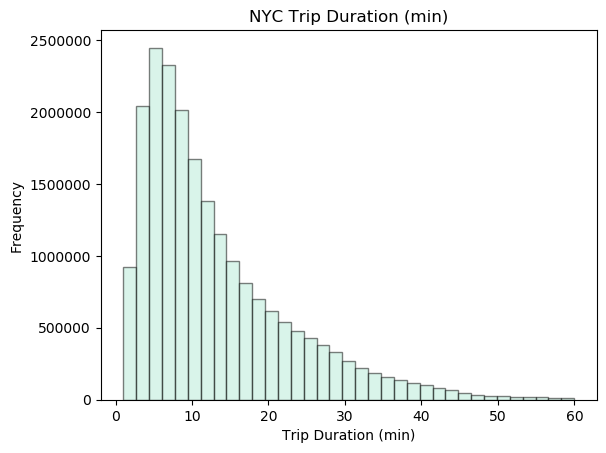

In [174]:
#___NYC___
df_duration_NYC['tripduration_min'][df_duration_NYC['tripduration_min']<60].plot.hist(bins = 35, title='NYC Trip Duration (min)', ec='black', alpha=0.5, color=color_dct['aqua_green'])#, log=True)
plt.xlabel("Trip Duration (min)")
plt.show()

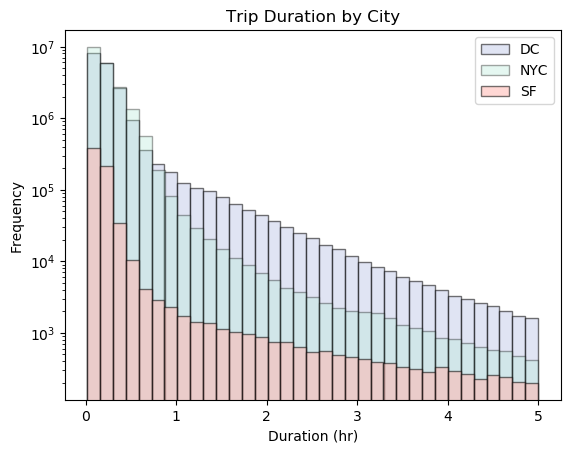

In [127]:
x = df_duration_NYC[df_duration_NYC['tripduration_hr']<=5][['tripduration_hr']].values.flatten()
y = df_duration_SF[df_duration_SF['tripduration_hr']<=5][['tripduration_hr']].values.flatten()
z = df_duration_DC[df_duration_DC['tripduration_hr']<=5][['tripduration_hr']].values.flatten()

plt.hist(z, bins=35, alpha=0.55, label='DC', ec='black', color=color_dct['purple'], log=True)
plt.hist(x, bins=35, alpha=0.35, label='NYC', ec='black', color=color_dct['aqua_green'], log=True) #, density=True
plt.hist(y, bins=35, alpha=0.55, label='SF', ec='black', color=color_dct['salmon'], log=True)


plt.legend(loc='upper right')
plt.title('Trip Duration by City')
plt.xlabel('Duration (hr)')
plt.ylabel('Frequency')
plt.show()

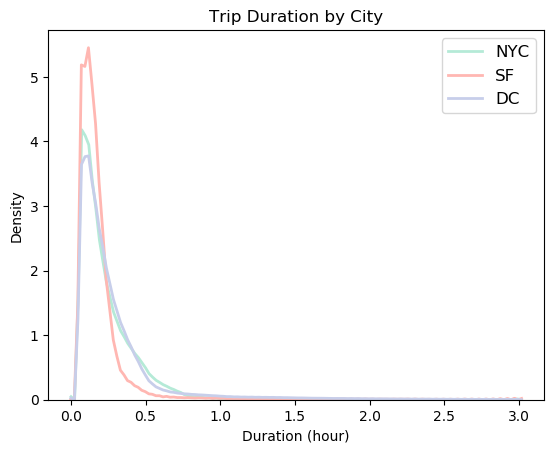

In [128]:
x = df_duration_NYC[df_duration_NYC['tripduration_hr']<=3][['tripduration_hr']].values.flatten()
y = df_duration_SF[df_duration_SF['tripduration_hr']<=3][['tripduration_hr']].values.flatten()
z = df_duration_DC[df_duration_DC['tripduration_hr']<=3][['tripduration_hr']].values.flatten()

num = [0,1,2]
lst = [x,y,z]
names = ['NYC','SF','DC']
col = [color_dct['aqua_green'], color_dct['salmon'], color_dct['purple']]

# Iterate through the five airlines
for N in num:
   
    # Draw the density plot
    sns.distplot(lst[N], hist = False, kde = True,
                 kde_kws = {'linewidth': 2},
                 label = names[N],
                 color=col[N])
    
# Plot formatting
# g.fig.get_axes()[0].set_yscale('log')
plt.legend(prop={'size': 12})
plt.title('Trip Duration by City')
plt.xlabel('Duration (hour)')
plt.ylabel('Density')
plt.show()

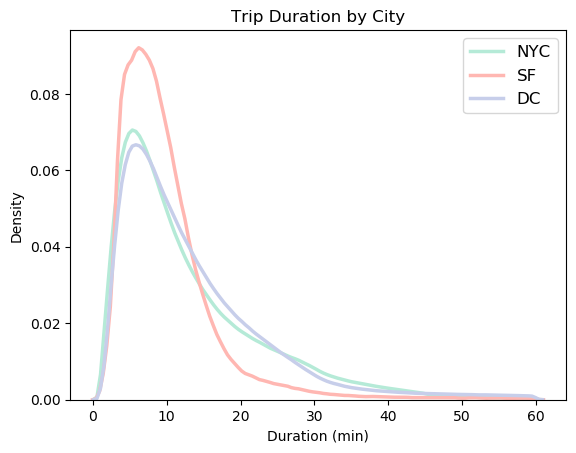

In [129]:
x = df_duration_NYC[df_duration_NYC['tripduration_min']<=60][['tripduration_min']].values.flatten()
y = df_duration_SF[df_duration_SF['tripduration_min']<=60][['tripduration_min']].values.flatten()
z = df_duration_DC[df_duration_DC['tripduration_min']<=60][['tripduration_min']].values.flatten()

num = [0,1,2]
lst = [x,y,z]
names = ['NYC','SF','DC']
col = [color_dct['aqua_green'], color_dct['salmon'], color_dct['purple']]

# Iterate through the five airlines
for N in num:
   
    # Draw the density plot
    sns.distplot(lst[N], hist = False, kde = True,
                 kde_kws = {'linewidth': 2.5},
                 label = names[N],
                color=col[N])
    
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Trip Duration by City')
plt.xlabel('Duration (min)')
plt.ylabel('Density')
plt.show()

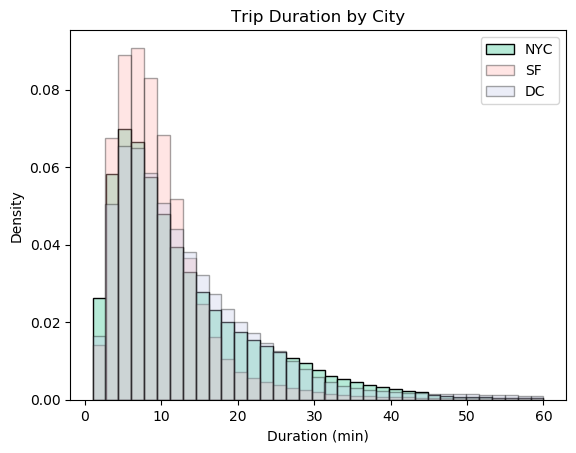

In [130]:
x = df_duration_NYC[df_duration_NYC['tripduration_min']<=60][['tripduration_min']].values.flatten()
y = df_duration_SF[df_duration_SF['tripduration_min']<=60][['tripduration_min']].values.flatten()
z = df_duration_DC[df_duration_DC['tripduration_min']<=60][['tripduration_min']].values.flatten()

plt.hist(x, bins=35, alpha=0.99, label='NYC', ec='black', density=True, color=color_dct['aqua_green'])
plt.hist(y, bins=35, alpha=0.35, label='SF', ec='black', density=True, color=color_dct['salmon'])
plt.hist(z, bins=35, alpha=0.35, label='DC', ec='black', density=True, color=color_dct['purple'])

plt.legend(loc='upper right')
plt.title('Trip Duration by City')
plt.xlabel('Duration (min)')
plt.ylabel('Density')
plt.show()

In [214]:
# del result_duration_NYC
# del df_duration_NYC

### Total Number of Stations, Years of Program, and Rides

In [143]:
#___SF___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
num_stations_SF = %sql SELECT COUNT (DISTINCT start_station_name) FROM trip;
num_stations_SF = num_stations_SF.DataFrame().values.flatten()[0]
num_stations_SF

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


74

In [131]:
#___DC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
num_stations_DC = %sql SELECT COUNT (DISTINCT start_station_name) FROM dc;
num_stations_DC = num_stations_DC.DataFrame().values.flatten()[0]
num_stations_DC

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


488

In [144]:
#___NYC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
num_stations_NYC = %sql SELECT COUNT (DISTINCT start_station_name) FROM cb;
num_stations_NYC = num_stations_NYC.DataFrame().values.flatten()[0]
num_stations_NYC

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


1230

In [139]:
#___SF___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Num_rows_SF = %sql SELECT COUNT(*) FROM trip;
Num_rows_SF = Num_rows_SF.DataFrame().values.flatten()[0]
Num_rows_SF

# %sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
# # %sql SELECT * FROM trip LIMIT 5;
# %sql SELECT * FROM trip LIMIT 5 OFFSET 669959-5;

#DATE RANGE SF
# 8/29/2013 to 8/31/2015

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


669959

In [136]:
#___DC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
Num_rows_DC = %sql SELECT COUNT(*) FROM dc;
Num_rows_DC = Num_rows_DC.DataFrame().values.flatten()[0]
Num_rows_DC

# %sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
# %sql SELECT * FROM dc LIMIT 5;
# # %sql SELECT * FROM dc LIMIT 5 OFFSET 19117643-5;

#DATE RANGE DC
# 2010-09-20 11:27:04 to 2017-12-31 23:58:21

 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


19117643

In [138]:
#___NYC___
%sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
Num_rows_NYC = %sql SELECT COUNT(*) FROM cb;
Num_rows_NYC = Num_rows_NYC.DataFrame().values.flatten()[0]
Num_rows_NYC

# %sql sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
# # %sql SELECT * FROM cb LIMIT 5;
# %sql SELECT * FROM cb LIMIT 5 OFFSET 99026236-5;

#DATE RANGE NYC
# 2013-07-01 to 2020-05-31

   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/Wash_DC/sqlite/dc.db
 * sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_master.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/citibike/sqlite/citi_bike_yr.db
   sqlite:////Users/michaellink/Desktop/__NYCDSA/_Projects/Capstone/data/kaggle/San_Francisco/SF.sqlite
Done.


99026236

In [141]:
print('The total number of rides taken in NYC: ', Num_rows_NYC)
print('The total number of rides taken in SF: ', Num_rows_SF)
print('The total number of rides taken in DC: ', Num_rows_DC)

The total number of rides taken in NYC:  99026236
The total number of rides taken in SF:  669959
The total number of rides taken in DC:  19117643


In [173]:
NYC_pop = 18804000
SF_pop = 3314000
DC_pop = 5322000

# pd.options.display.float_format = '{:,}'.format
d = {'City': ['San Francisco', 'New York City', 'Washington DC'],
     'Number of Stations': [num_stations_SF, num_stations_NYC, num_stations_DC],
     'Number of Rides': [Num_rows_SF, Num_rows_NYC, Num_rows_DC],
     'Data Timeframe': ['2013 - 2015', '2013 - 2020', '2010 - 2017'],
     'Rides per Year': [ int(round(Num_rows_SF / 2)), int(round(Num_rows_NYC / 7)), int(round(Num_rows_DC / 7))],
     'Rides per Year per Capita': [ (round(Num_rows_SF / (2*SF_pop),2)), (round(Num_rows_NYC / (7*NYC_pop),2)), (round(Num_rows_DC / (7*DC_pop),2))],
     }
df = pd.DataFrame(data=d)
df['Number of Rides'] = df.apply(lambda x: "{:,}".format(x['Number of Rides']), axis=1)
df['Number of Stations'] = df.apply(lambda x: "{:,}".format(x['Number of Stations']), axis=1)
df['Rides per Year'] = df.apply(lambda x: "{:,}".format(x['Rides per Year']), axis=1)
df['Rides per Year per Capita'] = df.apply(lambda x: "{:,}".format(x['Rides per Year per Capita']), axis=1)
df.sort_values(by=['Rides per Year'], ascending=True, inplace=True)
df.set_index('City', inplace=True)
df

,Number of Stations,Number of Rides,Data Timeframe,Rides per Year,Rides per Year per Capita
City,,,,,
New York City,"1,230","99,026,236",2013 - 2020,"14,146,605",0.75
Washington DC,488,"19,117,643",2010 - 2017,"2,731,092",0.51
San Francisco,74,"669,959",2013 - 2015,"334,980",0.1
